<div class="alert alert-block alert-info">
<font size="6"><b><center> Section 2</font></center>
<br>
<font size="6"><b><center> Fully-Connected, Feed-Forward Neural Network Examples </font></center>
</div>

# Example 1: A feedforward network with one hidden layer using torch.nn and simulated data

In developing (and training) a feedforward neural network, the developer needs to make many decisions (and many of these decisions are common to more complicated neural network, such as CNN and RNN):

  - the depth of the network (i.e. number of layer) 
  - the width of the network (i.e. number of hidden units per layer)
  - the type of nonlinear activation function applied in each hidden layer
  - the type of nonlinear activation function applied in the output layer
  - the loss function
  - the optimization algorithms
  - the regularization technique (*which we will consider in Section 3*)
  - number of epoch and batch size
  

## Simulate Data

The output is related to the input using the following function

$$y = 3x + x^2 exp(x) + \epsilon$$

where $\epsilon$ is an i.i.d. random variable

## Visualize the simulated data

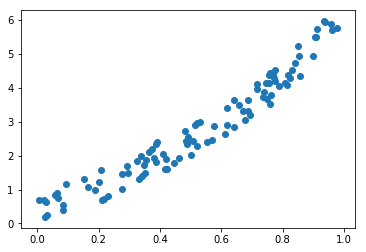

In [20]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.rand(100)
y = 3*x + np.power(x,2)*np.exp(x) + np.random.rand(100)

plt.scatter(x, y)
plt.show()

**Note: Before training, `numpy array` needs to be converted to `PyTorch's tensors`**

In [21]:
print(x.shape)
print(y.shape)

(100,)
(100,)


In [22]:
# convert numpy array to tensor in shape of input size
import torch 

x = torch.from_numpy(x.reshape(-1,1)).float()
y = torch.from_numpy(y.reshape(-1,1)).float()

In [23]:
print(x.shape)
print(y.shape)

torch.Size([100, 1])
torch.Size([100, 1])


## Create a network: First Attempt

### Create a linear regression model

In [55]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class LinearNet(nn.Module):
    def __init__(self):
        super(LinearNet, self).__init__()
        self.linearlayer1 = torch.nn.Linear(1, 1)
    
    def forward(self, x):
        y_pred = self.linearlayer1(x)      
        return y_pred

linearNet = LinearNet()
print(linearNet)

LinearNet(
  (linearlayer1): Linear(in_features=1, out_features=1, bias=True)
)


### Define Loss Function and Optimization Algorithm

In [56]:
# Define Optimizer and Loss Function
optimizer = torch.optim.SGD(linearNet.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()

### Model training and print losses

0


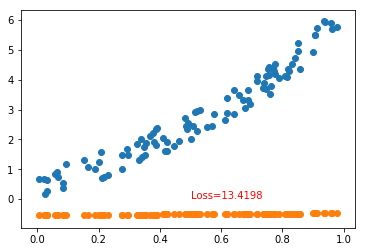

99


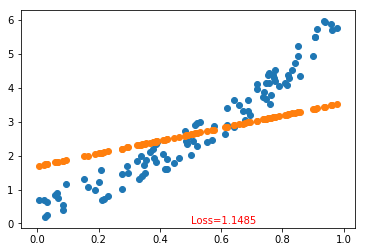

299


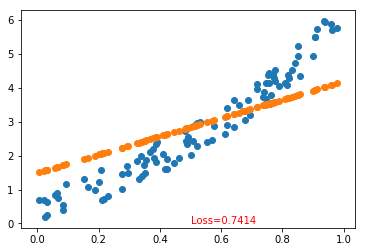

399


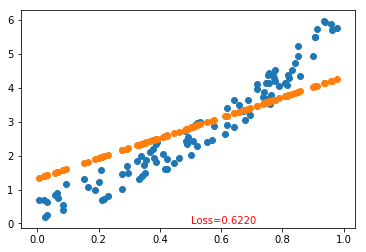

499


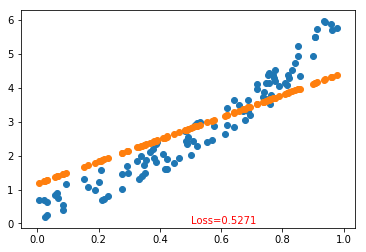

In [57]:
inputs  = Variable(x)
outputs = Variable(y)

for epoch in range(500):
    y_pred = linearNet(inputs)
    loss = loss_func(y_pred, outputs) 
    optimizer.zero_grad()
    loss.backward()        
    optimizer.step()       
    
    # Plot the prediction and print out the loss
    if epoch in [0,99,299,399,499]:
        print(epoch)
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        #plt.plot(x.data.numpy(), y_pred.data.numpy(), 'r-', lw=2)
        plt.scatter(x.data.numpy(), y_pred.data.numpy())
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 10, 'color':  'red'})
        plt.pause(0.1)

plt.show()

## Create a Network: 2nd Attempt

### Define a Feed-forward network with 1 hidden layer

In [58]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class ffNet(nn.Module):
    def __init__(self):
        super(ffNet, self).__init__()
        self.linearlayer1 = torch.nn.Linear(1, 4)
        self.linearlayer2 = torch.nn.Linear(4, 1)

        self.relu = torch.nn.ReLU()
    
    
    def forward(self, x):
        out1 = self.relu(self.linearlayer1(x))
        y_pred = self.linearlayer2(out1)      
        return y_pred

ffnet = ffNet()
print(ffnet)

ffNet(
  (linearlayer1): Linear(in_features=1, out_features=4, bias=True)
  (linearlayer2): Linear(in_features=4, out_features=1, bias=True)
  (relu): ReLU()
)


### Define loss function and optimization algorithm

In [59]:
# Define Optimizer and Loss Function
optimizer = torch.optim.SGD(ffnet.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()

### Model Training

0


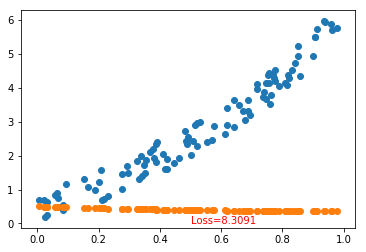

99


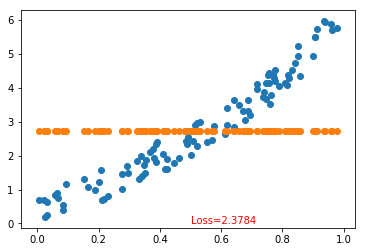

299


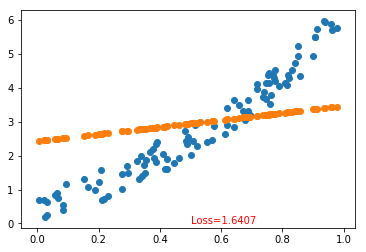

399


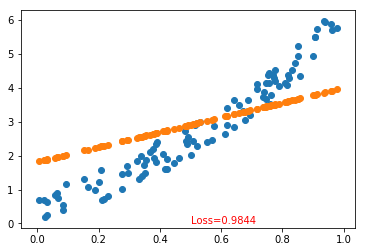

499


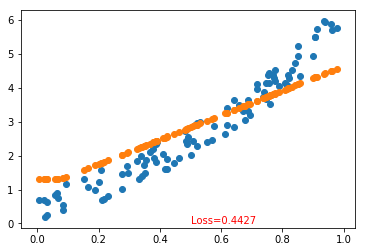

In [60]:
inputs  = Variable(x)
outputs = Variable(y)

for epoch in range(500):
    y_pred = ffnet(inputs)
    loss = loss_func(y_pred, outputs) 
    optimizer.zero_grad()
    loss.backward()        
    optimizer.step()       
    
    if epoch in [0,99,299,399,499]:
        print(epoch)
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy())
        #plt.plot(x.data.numpy(), y_pred.data.numpy(), 'r-', lw=2)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 10, 'color':  'red'})
        plt.pause(0.1)

plt.show()

## Create a Network: 3rd Attempt

### Define a Feed-forward network with 2 hidden layers

In [61]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class ffNet(nn.Module):
    def __init__(self):
        super(ffNet, self).__init__()
        self.linearlayer1 = torch.nn.Linear(1, 16)
        self.linearlayer2 = torch.nn.Linear(16, 8)
        self.linearlayer3 = torch.nn.Linear(8, 1)

        self.relu = torch.nn.ReLU()

    def forward(self, x):
        out1 = self.relu(self.linearlayer1(x))
        out2 = self.relu(self.linearlayer2(out1))
        y_pred = self.linearlayer3(out2)      
        return y_pred

ffnet = ffNet()
print(ffnet)

ffNet(
  (linearlayer1): Linear(in_features=1, out_features=16, bias=True)
  (linearlayer2): Linear(in_features=16, out_features=8, bias=True)
  (linearlayer3): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)


### Define loss function and optimization algorithm

In [62]:
# Define Optimizer and Loss Function
optimizer = torch.optim.SGD(ffnet.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()

### Model Training

0


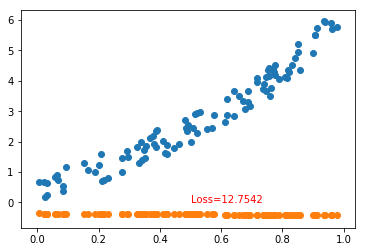

99


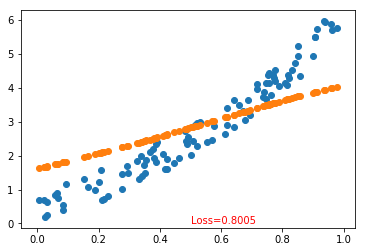

299


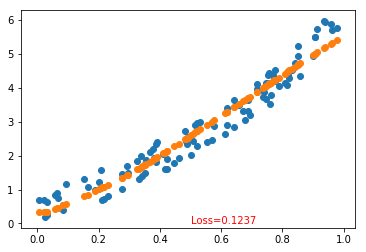

399


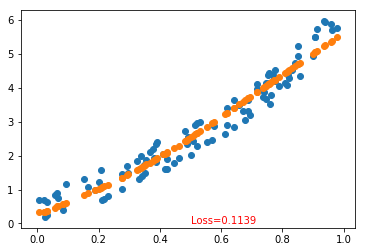

499


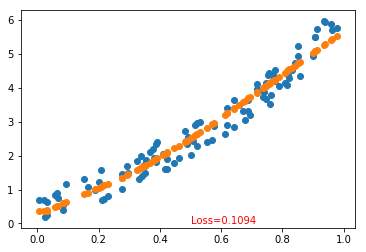

In [63]:
inputs  = Variable(x)
outputs = Variable(y)

for epoch in range(500):
    y_pred = ffnet(inputs)
    loss = loss_func(y_pred, outputs) 
    optimizer.zero_grad()
    loss.backward()        
    optimizer.step()       
    
    if epoch in [0,99,299,399,499,999]:
        print(epoch)
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        #plt.plot(x.data.numpy(), y_pred.data.numpy(), 'r', lw=1)
        plt.scatter(x.data.numpy(), y_pred.data.numpy())
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 10, 'color':  'red'})
        plt.pause(0.1)

plt.show()